# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [27]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from seaborn import load_dataset
from sklearn.metrics import r2_score

In [3]:
#Loading dataset
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / ((tips['total_bill']) - tips['tip'])
tips['net_bill']=((tips['total_bill']) - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

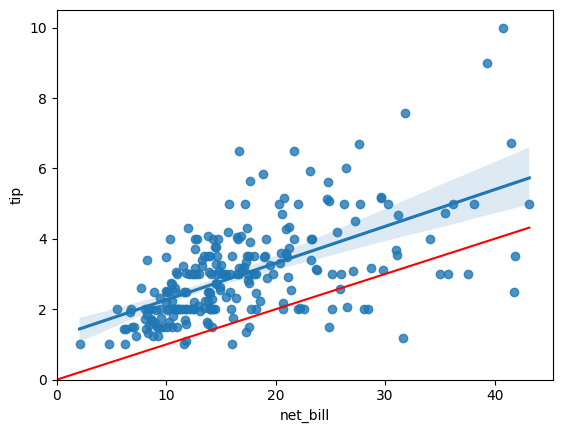

In [16]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])
# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x
# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')
# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [42]:
#calculando o coeficiente de determinação
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg1.params)
print(reg1.rsquared)

Intercept    1.330698
net_bill     0.099334
dtype: float64
0.3325407312323707


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 1.0)

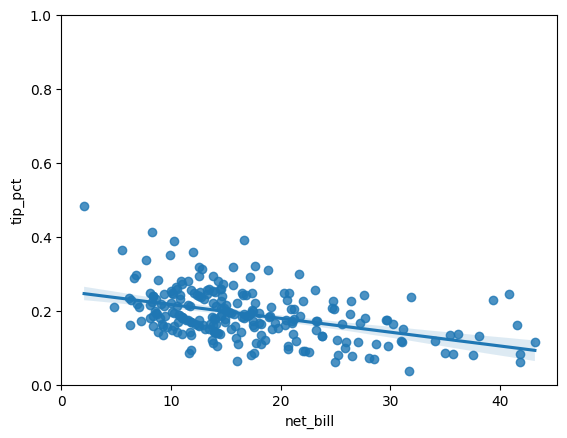

In [17]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
# Opções estéticas para explicitar o (0,1) no gráfico
plt.xlim(left = 0)
plt.ylim(0, 1)

In [41]:
#calculando o coeficiente de determinação
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

print(reg2.params)
print(reg2.rsquared)

Intercept    0.305297
net_bill    -0.006146
dtype: float64
0.09129084920662944


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os dois gráficos são inversamente proporcionais; no entanto, ao analisarmos individualmente, percebemos que no primeiro gráfico, quando os valores de "net_bill" aumentam, os valores de "tip" também aumentam. Já no segundo gráfico, quando "net_bill" aumenta, "tip_pct" tende a diminuir.

Ambos os modelos têm um baixo coeficiente de determinação, porém o primeiro modelo possui um R² melhor em comparação com o segundo.

R² do modelo "tip" = 0.3325

R² do modelo "tip_pct" = 0.0912

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [24]:
#1
pred = reg2.fittedvalues

In [38]:
#2
tip = pred*tips.net_bill

In [39]:
#3
r2= r2_score(y_true=tips['tip'], y_pred=tip)

In [40]:
#4
print("Coenfieciente de determinacao do modelo tip:", r2)
print("O coeficiente de determinacao do item 1:",reg1.rsquared)

Coenfieciente de determinacao do modelo tip: 0.10889974845461325
O coeficiente de determinacao do item 1: 0.3325407312323707
